In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Multi-step models

In [9]:
multi_step_metrics = pd.read_csv('../data_modeling/multi_step_models_metrics.csv', index_col=0)
multi_step_metrics

,heading,type,steps,model,rmse,mae
0,712909000,usd_kg,30,linear_regression,6.856355,4.472957
1,712909000,usd_kg,30,gam,6.460026,4.071223
2,712909000,usd_kg,30,prophet_3,6.924677,4.333122
3,712909000,usd_kg,30,arima,6.836912,4.432349
4,712909000,usd_kg,30,gradient_boosting,10.760266,9.880288
...,...,...,...,...,...,...
1405,811109000,net_weight,90,linear_regression,136820.004102,77267.650920
1406,811109000,net_weight,90,gam,128712.895769,76100.852910
1407,811109000,net_weight,90,prophet_3,141046.689514,113149.075873
1408,811109000,net_weight,90,arima,132990.783008,79781.840715


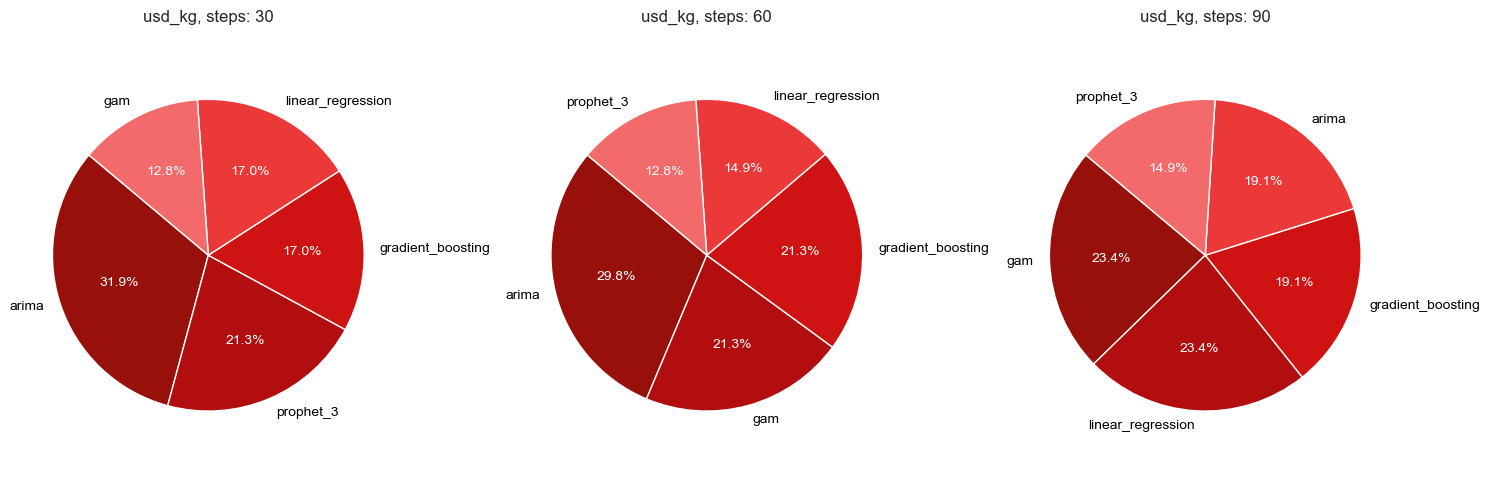

In [63]:
observations = 'usd_kg'
steps_values = [30, 60, 90]

# Define a custom color palette
custom_colors = sns.color_palette(['#97100A', '#B20E0F', '#CF1313', '#EB3838', '#F26A6A'])

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each step value and create a pie chart in the corresponding subplot
for idx, step in enumerate(steps_values):
    ranking = multi_step_metrics[(multi_step_metrics['type'] == observations) & (multi_step_metrics['steps'] == step)]\
        .groupby(['heading', 'type', 'steps'])\
        .apply(lambda x: x.loc[x['mae'].idxmin()])

    model_counts = ranking['model'].value_counts()

    patches, texts, autotexts = axes[idx].pie(model_counts,
                                             labels=model_counts.index,
                                             autopct='%1.1f%%',
                                             startangle=140,
                                             colors=custom_colors,
                                             textprops={'color': 'white'})
    axes[idx].set_title(f'{observations}, steps: {step}')
    axes[idx].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Set font color outside the pie chart to black
    for text in texts:
        text.set_color('black')

plt.tight_layout()
plt.show()

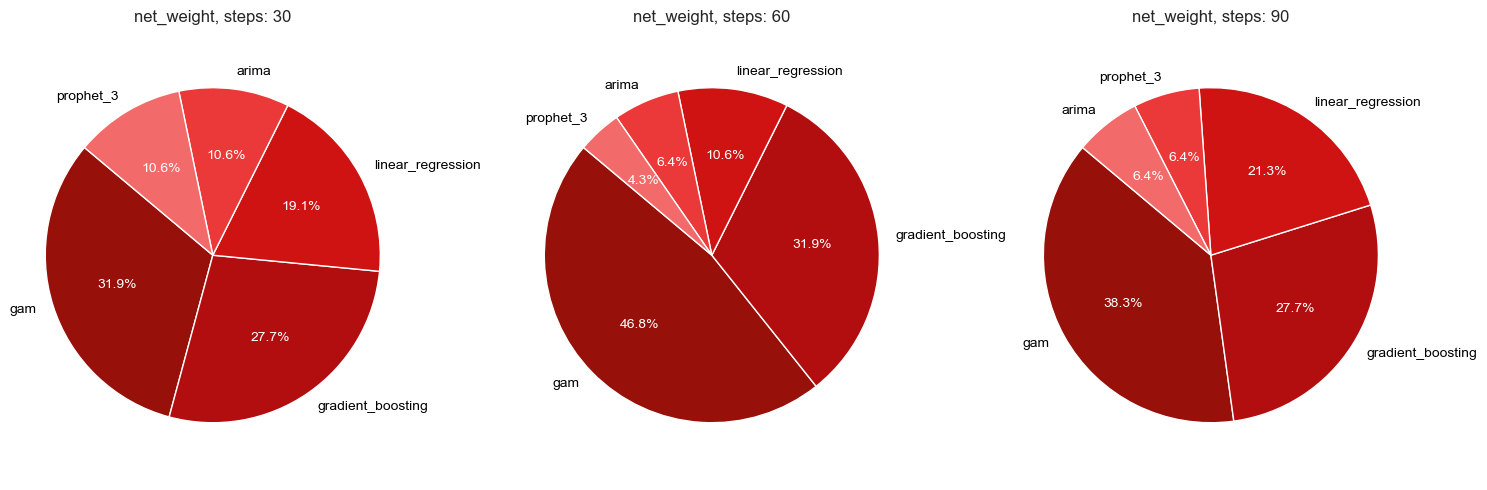

In [61]:
observations = 'net_weight'
steps_values = [30, 60, 90]

# Define a custom color palette
custom_colors = sns.color_palette(['#97100A', '#B20E0F', '#CF1313', '#EB3838', '#F26A6A'])

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each step value and create a pie chart in the corresponding subplot
for idx, step in enumerate(steps_values):
    ranking = multi_step_metrics[(multi_step_metrics['type'] == observations) & (multi_step_metrics['steps'] == step)]\
        .groupby(['heading', 'type', 'steps'])\
        .apply(lambda x: x.loc[x['mae'].idxmin()])

    model_counts = ranking['model'].value_counts()

    patches, texts, autotexts = axes[idx].pie(model_counts,
                                             labels=model_counts.index,
                                             autopct='%1.1f%%',
                                             startangle=140,
                                             colors=custom_colors,
                                             textprops={'color': 'white'})
    axes[idx].set_title(f'{observations}, steps: {step}')
    axes[idx].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Set font color outside the pie chart to black
    for text in texts:
        text.set_color('black')

plt.tight_layout()
plt.show()

### Non multi-step models


In [28]:
non_multi_step_metrics = pd.read_csv('../data_modeling/prophet_models_metrics.csv', index_col=0)
non_multi_step_metrics

,heading,type,model,rmse,mae
0,712909000,usd_kg,prophet_1,6.966917,4.755453
1,712909000,usd_kg,prophet_2,6.343335,4.155123
2,712909000,net_weight,prophet_1,30075.834391,22766.623582
3,712909000,net_weight,prophet_2,24999.417760,16602.592631
4,805291000,usd_kg,prophet_1,0.347252,0.316938
...,...,...,...,...,...
183,705190000,net_weight,prophet_2,1185.623684,720.219026
184,811109000,usd_kg,prophet_1,0.617624,0.527427
185,811109000,usd_kg,prophet_2,0.584359,0.491482
186,811109000,net_weight,prophet_1,140111.864698,112688.477808


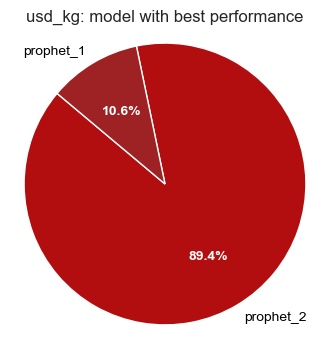

In [49]:
observations = 'usd_kg'

ranking = non_multi_step_metrics[(non_multi_step_metrics['type'] == observations)]\
        .groupby(['heading', 'type'])\
        .apply(lambda x: x.loc[x['mae'].idxmin()])

model_counts = ranking['model'].value_counts()


custom_colors = sns.color_palette(['#B20E0F', '#9E2223'])
plt.figure(figsize=(4, 4))
pie_chart = plt.pie(
    model_counts,
    labels=model_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors,
    textprops={'color': 'white', 'weight': 'bold'}  # Set the font color to white
)
plt.setp(pie_chart[1], color='black', weight='normal')
plt.title('{}: model with best performance'.format(observations))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



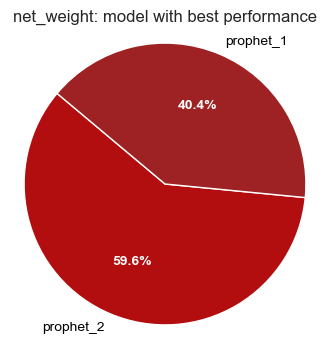

In [50]:
observations = 'net_weight'

ranking = non_multi_step_metrics[(non_multi_step_metrics['type'] == observations)]\
        .groupby(['heading', 'type'])\
        .apply(lambda x: x.loc[x['mae'].idxmin()])

model_counts = ranking['model'].value_counts()

custom_colors = sns.color_palette(['#B20E0F', '#9E2223'])
plt.figure(figsize=(4, 4))
pie_chart = plt.pie(
    model_counts,
    labels=model_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors,
    textprops={'color': 'white', 'weight': 'bold'}  # Set the font color to white
)
plt.setp(pie_chart[1], color='black', weight='normal')
plt.title('{}: model with best performance'.format(observations))
plt.axis('equal')
plt.show()